In [31]:
import numpy as np
import matplotlib.pyplot as plt

def construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q, rho):
    potential = alpha * x**2 + q*rho**0.3
    potential = np.diag(potential)

    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (mass * dx**2) * finite_diff
    
    hamiltonian = kinetic + potential*np.eye(N)

    return hamiltonian

from scipy import special

def getPsi_x(n,k):
    '''
    Definition of exact HO wavefunction taken from Zettili page 240.
    
    Parameters
    ----------
    n : TYPE
        principle quantum number for SE equation
    k : TYPE
        harmonic oscillator parameter (mass*omega)^2 from the potential term \mu^2 \omega^{2} x^{2} in the SE.

    Returns
    -------
    wf : function
        1-d wavefunction for the 1d-harmonic oscillator as a function of position x. 
    '''
    herm = special.hermite(n)
    def wf(x):
        result = (1/np.sqrt(np.sqrt(np.pi)*2**(n)*np.math.factorial(n)*(k)**(.25)))*np.exp(-x**(2)*np.sqrt(k)/2)*herm(x*k**(.25))
        return(result)
    return wf

def getExactLambda(n,mass,alpha):
    '''
    Exact eigenvalues of the HO equation. -f''(x) + k x^2 f(x) = 2 m E f(x)
    Lambda = 2 m E  
    E = (n + .5) \omega 
    \alpha = m^2 \omega^2 
    \omega = \sqrt{alpha/m^2}
    Parameters
    ----------
    n : float
        principle quantum number. float integers
    omega : float
        oscillator frequency.

    Returns
    -------
    float
        oscillator energy 2mE. 
    '''
    return 2*mass*(.5 + n)*np.sqrt(alpha/mass**2)



<function matplotlib.pyplot.show(close=None, block=None)>

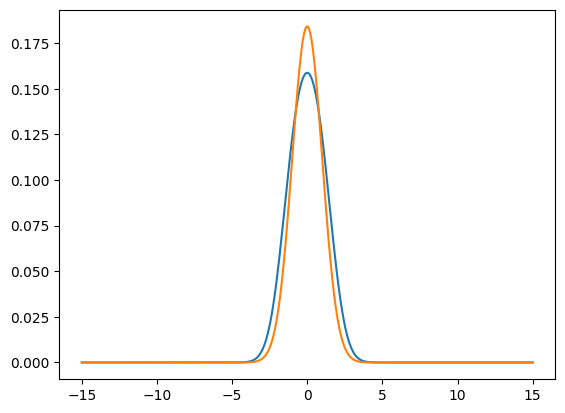

In [32]:
x_min = -15.0
x_max = 15.0
N = 500

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1.0
h_bar = 1.0
alpha = 1.0
q = 10

init_guess = getPsi_x(0,alpha)(x)/np.linalg.norm(getPsi_x(0,alpha)(x))

init_rho = np.conj(init_guess)*init_guess

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q, init_rho)

eigval, eigvec = np.linalg.eigh(hamiltonian)

eigvec = eigvec.T

level = 0

plt.plot(x,eigvec[level]/np.linalg.norm(eigvec[level]))
plt.plot(x,getPsi_x(level,alpha)(x)/np.linalg.norm(getPsi_x(level,alpha)(x)))

plt.show

Convergence:  12.419749590962256
Convergence:  7.142157237882811
Convergence:  3.499073858576015
Convergence:  1.25255076885432
Convergence:  0.802353685050349
Convergence:  0.5227193938384289
Convergence:  0.339034010895535
Convergence:  0.18861500830826827
Convergence:  0.09390304882374423
Convergence:  0.041433278261035156
Convergence:  0.018337827157917985
Convergence:  0.008054627053798669
Convergence:  0.0036685305418053815
Convergence:  0.001676312961045312
Convergence:  0.0007911035186154436
Convergence:  0.00037600441072527246
Convergence:  0.0001885519947393277
Convergence:  9.841103580754407e-05
Convergence:  5.6294092750874825e-05
Convergence:  3.4476993391763244e-05
Convergence:  2.3008104417243658e-05
Convergence:  1.6031968353757975e-05
Convergence:  1.1589931109057261e-05
Convergence:  8.428461221399175e-06
Convergence:  6.136592272554253e-06
Convergence:  4.404502433885682e-06
Convergence:  3.106693934995519e-06
Convergence:  2.1307636650647055e-06
Convergence:  1.4102

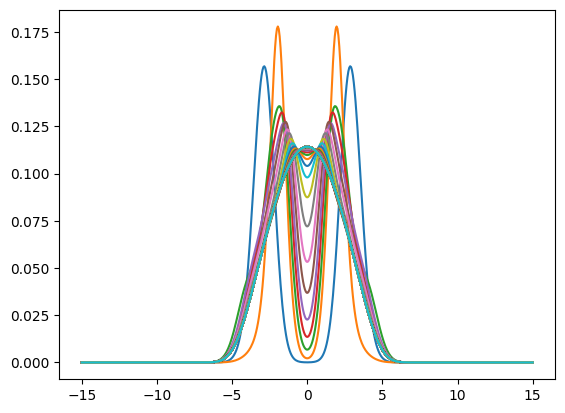

In [34]:
x_min = -15.0
x_max = 15.0
N = 500

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1.0
h_bar = 1.0
alpha = 1.0
q = 100

init_guess = getPsi_x(0,alpha)(x)/np.linalg.norm(getPsi_x(0,alpha)(x))

rho = np.conj(init_guess)*init_guess

n_iterations = 100

wfs = []

mixing = 0.1
oldval = 1.0
for i in range(n_iterations):

    hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q, rho)

    eigval, eigvec = np.linalg.eigh(hamiltonian)

    print("Convergence: ",np.abs(eigval[0]-oldval))
    
    oldval = eigval[0]
    
    eigvec = eigvec.T
    
    wfs.append(eigvec[0])
    
    rho = mixing*np.conj(eigvec[0])*eigvec[0] + (1-mixing)*rho
    plt.plot(x,np.abs(wfs[i]))